# Jay Patel
## Final Project

# 1.0 Introduction and Importing data/libraries

In [ ]:
#importing required libraries and uploading Data file

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import random
from google.colab import files 
upload = files.upload()

MessageError: ignored

In [ ]:
#importing required libraries and reading the data file

playstore = pd.read_csv ('googleplaystore - Copy (2).csv')

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
playstore.head ()




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#To see the data type
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#to find the missing values
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#shape of the document
playstore.shape

(10841, 13)

# 2.0 Preprocessing Cleaning and Transformation 

## Variables of dataset

In [ ]:
variable = pd.DataFrame(columns=['Variable Name','Number of variables','Details of Variables'])
for i, var in enumerate(playstore.columns):
  variable.loc[i] = [var, playstore[var].nunique(), playstore[var].unique().tolist()]
    
variable

,Variable Name,Number of variables,Details of Variables
0,App,9660,[Photo Editor & Candy Camera & Grid & ScrapBoo...
1,Category,34,"[ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO..."
2,Rating,40,"[4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ..."
3,Reviews,6002,"[159, 967, 87510, 215644, 167, 178, 36815, 137..."
4,Size,462,"[19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3...."
5,Installs,22,"[10,000+, 500,000+, 5,000,000+, 50,000,000+, 1..."
6,Type,3,"[Free, Paid, nan, 0]"
7,Price,93,"[0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ..."
8,Content Rating,6,"[Everyone, Teen, Everyone 10+, Mature 17+, Adu..."
9,Genres,120,"[Art & Design, Art & Design;Pretend Play, Art ..."


## 2.1 Detecting Outliers

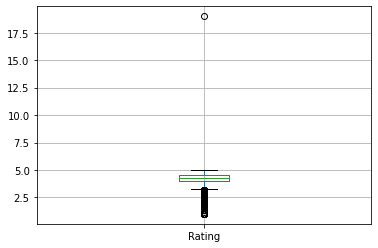

In [ ]:
playstore.boxplot("Rating")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10e8cb7290>]],
      dtype=object)

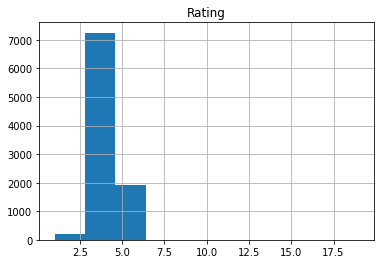

In [ ]:
playstore.hist("Rating")

In [ ]:
playstore[playstore.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
playstore.drop([10472], inplace=True)
playstore[10471:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


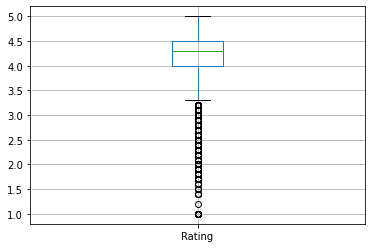

In [ ]:
playstore.boxplot("Rating")

## 2.2 Data Cleaning

In [ ]:
# to deal with missing value we are replacing missing values with mean of all value for specific attribute
# Here we are cleaning data for Rating attribute

from sklearn.impute import SimpleImputer
SmplImptr = SimpleImputer()
playstore['Rating'] = SmplImptr.fit_transform(playstore[['Rating']])
playstore['Rating'].round(1)


# For Type, Content Rating, Current Ver and Android Version, rows were dropped which have missing values.
playstore.dropna(axis=0, inplace=True)

In [ ]:
playstore.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
playstore.shape

(10829, 13)

## 2.2 Data Transformation

In [ ]:
#Dropping unnecessary columns/attributes from the data

playstore.drop(labels= ['Last Updated', 'Current Ver', 'Android Ver', 'App', 'Content Rating', 'Genres'], axis = 1, inplace= True)
playstore.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  10829 non-null  object 
 1   Rating    10829 non-null  float64
 2   Reviews   10829 non-null  object 
 3   Size      10829 non-null  object 
 4   Installs  10829 non-null  object 
 5   Type      10829 non-null  object 
 6   Price     10829 non-null  object 
dtypes: float64(1), object(6)
memory usage: 676.8+ KB


In [ ]:
#Converting attributes values to Numeric

#For Reviews Column
playstore ['Reviews'] = pd.to_numeric(playstore['Reviews'])

#For Size Column
playstore ['Size'] = playstore['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
playstore ['Size'] = playstore['Size'].apply(lambda x: str(x).replace('Varies with device','nan') if 'Varies with device' in str(x) else x)

playstore ['Size'] = playstore['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)
playstore ['Size'] = playstore['Size'].apply(lambda x: float(x))
playstore = playstore[pd.notnull(playstore['Size'])]

#for Installs Column
playstore ['Installs'] = playstore['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)
playstore ['Installs'] = playstore['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else x)
playstore ['Installs'] = playstore['Installs'].apply(lambda x: int(x))

#for Type Column (Conerting to Binary)
def type_cat(Types_bin):
  if Types_bin == 'Free':
    return 0
  else:
    return 1
playstore['Type'] = playstore['Type'].map(type_cat)


#for Price Column
playstore ['Price'] = playstore['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
playstore ['Price'] = playstore['Price'].apply(lambda x: float(x))


#For Category Column
Str_Category = playstore["Category"].unique()
lenStr_Category = len(Str_Category)
values_Category = {}
for i in range (0, lenStr_Category):
    values_Category[Str_Category[i]] = i
playstore['Category_2'] = playstore['Category'].map(values_Category).astype(int)

##For Category Column (Label Encoding)
playstore_dummies = pd.get_dummies(playstore, columns=['Category'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
playstore.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    9135 non-null   object 
 1   Rating      9135 non-null   float64
 2   Reviews     9135 non-null   int64  
 3   Size        9135 non-null   float64
 4   Installs    9135 non-null   int64  
 5   Type        9135 non-null   int64  
 6   Price       9135 non-null   float64
 7   Category_2  9135 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 642.3+ KB


In [ ]:
playstore.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Category_2
0,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,0
1,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,0
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,0
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,0
4,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,0


In [ ]:
playstore_dummies.head()

,Rating,Reviews,Size,Installs,Type,Price,Category_2,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19.0,10000,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14.0,500000,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7,5000000,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25.0,50000000,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8,100000,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
playstore.describe()

,Rating,Reviews,Size,Installs,Type,Price,Category_2
count,9135.000000,9.135000e+03,9135.000000,9.135000e+03,9135.000000,9135.000000,9135.000000
mean,4.176690,2.493186e+05,21.534957,7.122458e+06,0.078927,1.185283,17.610728
std,0.500816,1.717130e+06,22.593662,4.621827e+07,0.269640,17.365220,7.342431
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,0.000000,0.000000
25%,4.100000,2.200000e+01,4.900000,1.000000e+03,0.000000,0.000000,14.000000
50%,4.200000,7.420000e+02,13.000000,1.000000e+05,0.000000,0.000000,18.000000
75%,4.500000,2.516900e+04,30.000000,1.000000e+06,0.000000,0.000000,23.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,1.000000,400.000000,32.000000


# 3. Data Visualization

In [ ]:
group = playstore.groupby('Category')
a = group['Installs'].agg(np.mean)
b = group['Price'].agg(np.sum)
c = group['Reviews'].agg(np.mean)
print (a, b, c)

Category
ART_AND_DESIGN         1.628411e+06
AUTO_AND_VEHICLES      5.836028e+05
BEAUTY                 2.914245e+05
BOOKS_AND_REFERENCE    7.140871e+05
BUSINESS               1.340196e+06
COMICS                 3.448265e+05
COMMUNICATION          1.864884e+07
DATING                 6.692491e+05
EDUCATION              2.511730e+06
ENTERTAINMENT          1.056622e+07
EVENTS                 1.872307e+05
FAMILY                 3.717186e+06
FINANCE                1.032324e+06
FOOD_AND_DRINK         1.776887e+06
GAME                   2.943307e+07
HEALTH_AND_FITNESS     3.289439e+06
HOUSE_AND_HOME         1.104595e+06
LIBRARIES_AND_DEMO     7.518014e+05
LIFESTYLE              1.269046e+06
MAPS_AND_NAVIGATION    1.620647e+06
MEDICAL                1.072440e+05
NEWS_AND_MAGAZINES     1.968521e+07
PARENTING              4.439076e+05
PERSONALIZATION        2.827674e+06
PHOTOGRAPHY            1.007046e+07
PRODUCTIVITY           9.050537e+06
SHOPPING               7.483825e+06
SOCIAL             

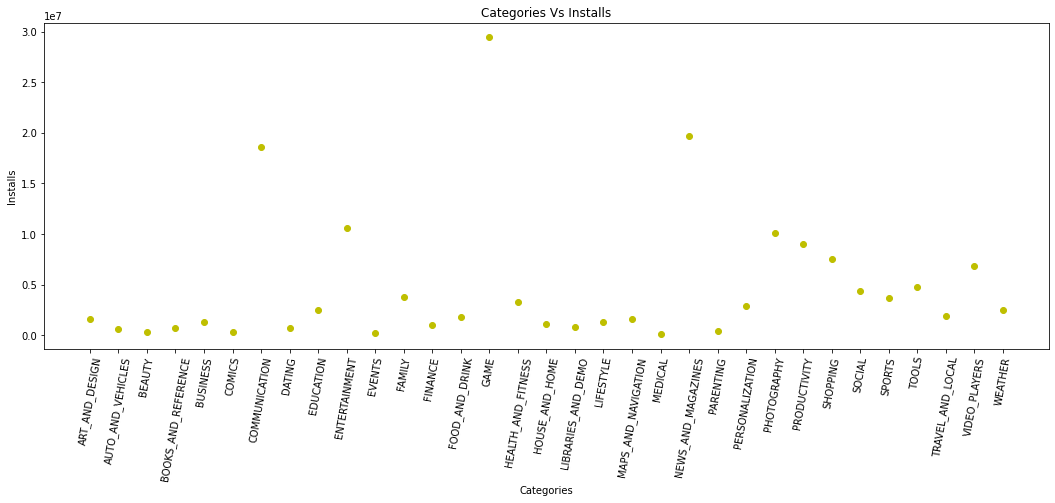

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(a , 'o', color='y')
plt.xticks(rotation=80)
plt.title('Categories Vs Installs')
plt.xlabel('Categories')
plt.ylabel('Installs')
plt.show()

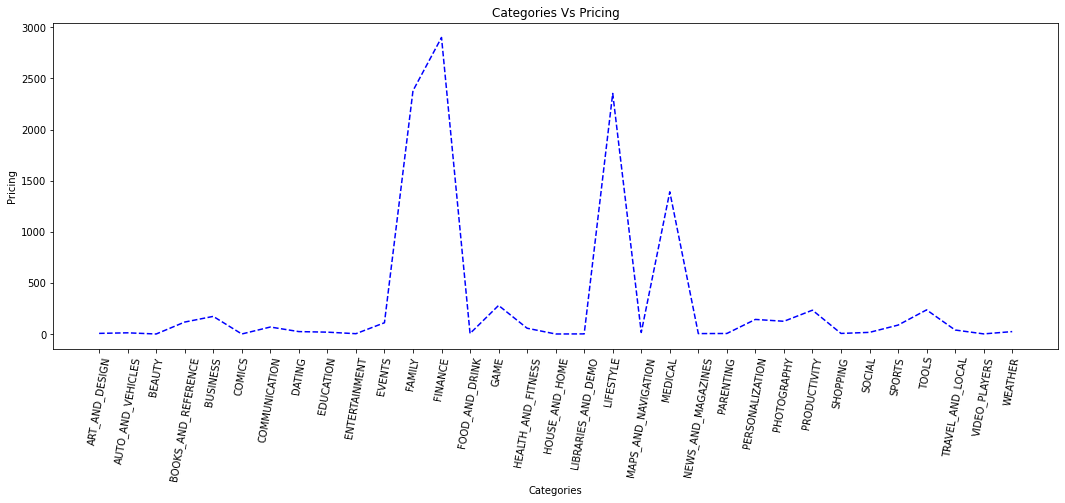

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(b , 'r--', color='b')
plt.xticks(rotation=80)
plt.title('Categories Vs Pricing')
plt.xlabel('Categories')
plt.ylabel('Pricing')
plt.show()

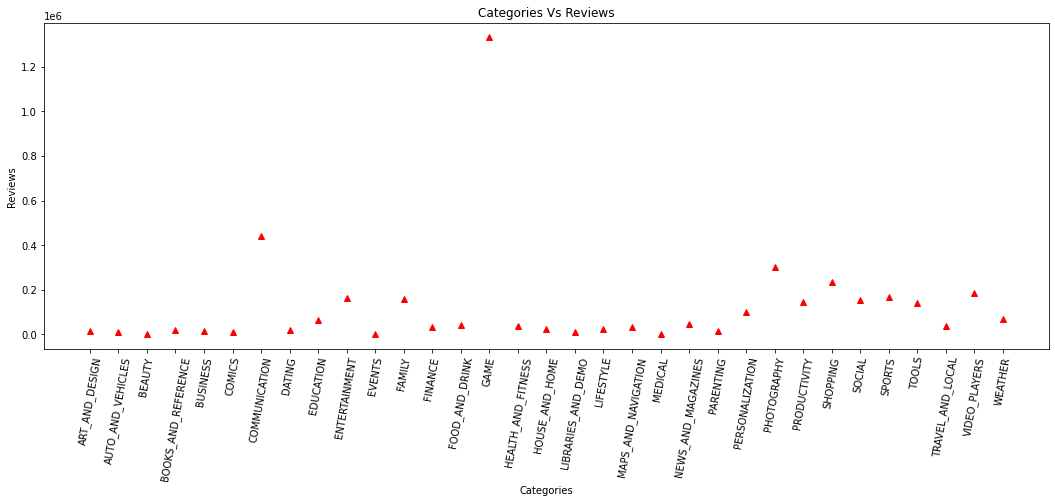

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(c , 'r^')
plt.xticks(rotation=80)
plt.title('Categories Vs Reviews')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()

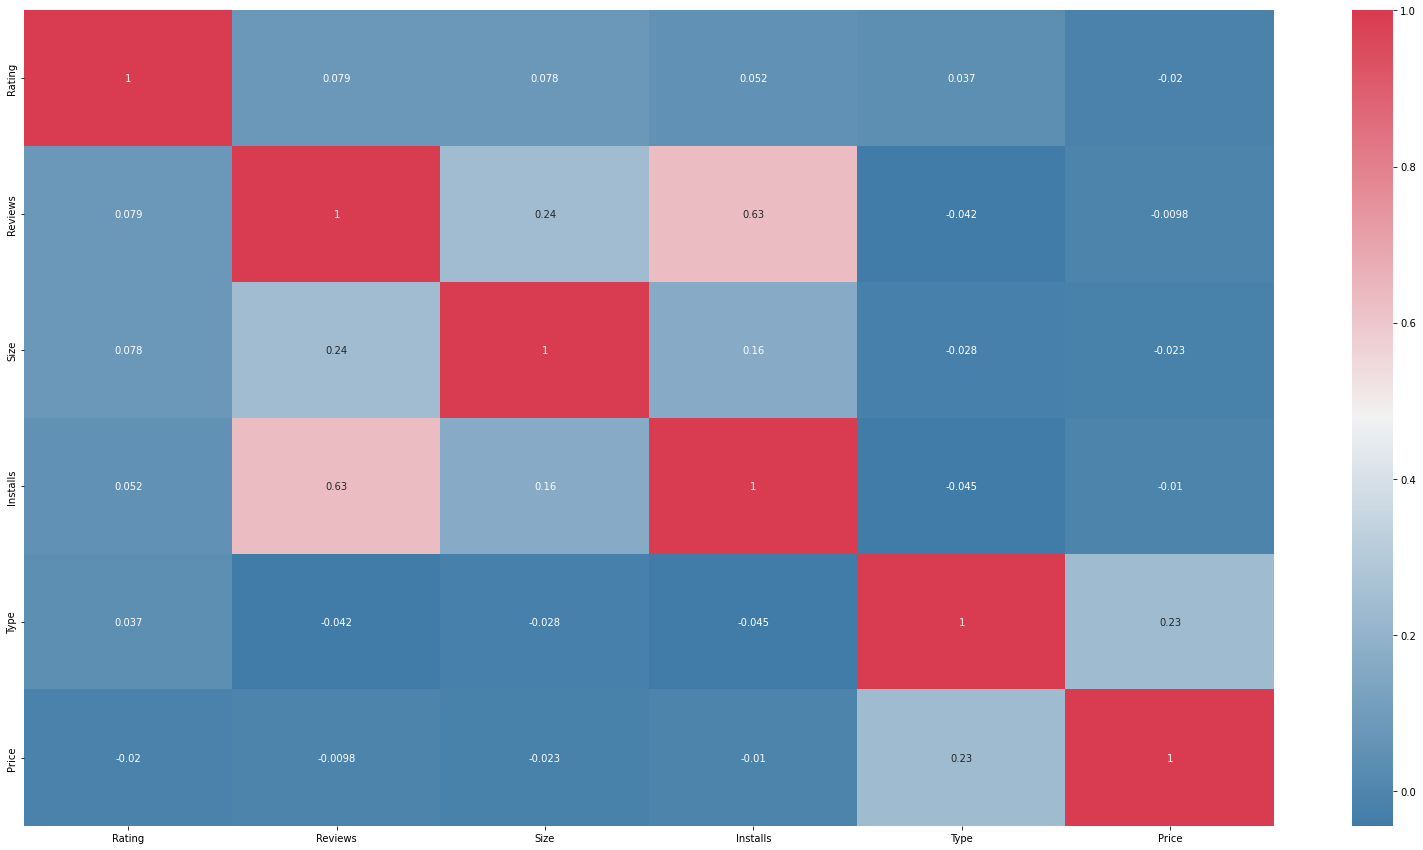

In [ ]:

plt.figure(figsize=(28,15))
playstore_matrix = playstore.copy()
playstore_matrix.drop(labels= ['Category_2'], axis= 1, inplace = True) 
sns.heatmap(playstore_matrix.corr(), annot=True, cmap=sns.diverging_palette(240, 8, as_cmap=True))

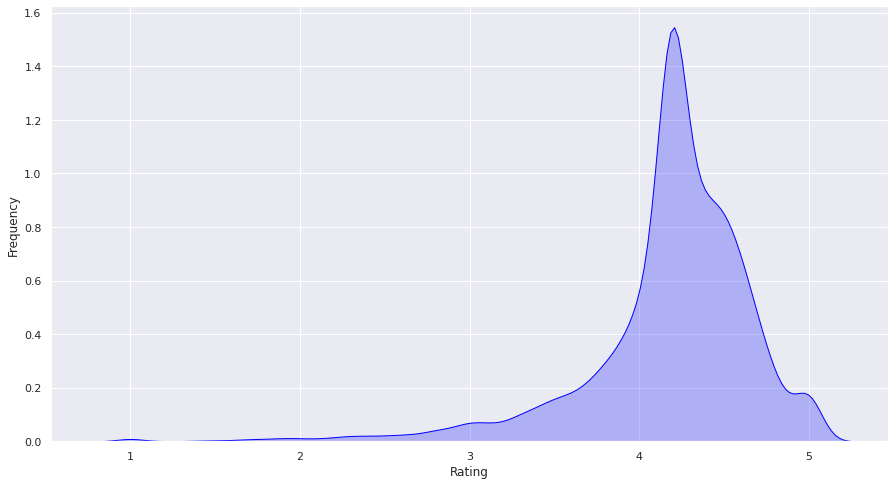

In [ ]:


sns.set(rc={'figure.figsize':(15,8)})
sns.kdeplot(playstore.Rating, color='blue', shade=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 4.0 Data Mining Models

### Creating Terms for Errors

In [ ]:
def Evaluationmatrix (trueY, PredictedY):
  print ('MSE:'+ str(metrics.mean_squared_error(trueY, PredictedY)))
  print ('MAE:'+ str(metrics.mean_absolute_error(trueY, PredictedY)))
  print ('R2_score'+ str(metrics.r2_score(trueY, PredictedY)))

In [ ]:
def Evaluationmatrix_dict(trueY, PredictedY, name = 'Linear Integer'):
  matrix = {}
  matrix['Model Name'] = name
  matrix['MSE'] = metrics.mean_squared_error(trueY, PredictedY)
  matrix['MAE'] = metrics.mean_absolute_error(trueY, PredictedY)
  matrix['R2_score'] = metrics.r2_score(trueY, PredictedY)

  return matrix

## 4.1 Linear Regression



In [ ]:
#Label Encoding
X = playstore.drop(labels= ['Category', 'Rating'], axis=1)
y = playstore.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

LR1= LinearRegression()
LR1.fit(X_train, y_train)
ResultLR = LR1.predict(X_test) 

MSElr = metrics.mean_squared_error(y_test, ResultLR)
MAElr = metrics.mean_absolute_error(y_test, ResultLR)
R2lr = metrics.r2_score(y_test, ResultLR)

#EVALUATION
playstore_result = pd.DataFrame()
playstore_result = playstore_result.from_dict(Evaluationmatrix_dict(y_test, ResultLR, name = 'LR Label Encoding'), orient = "index")
playstore_result = playstore_result.transpose()


#Printing results

print ('Label Encoding')
print ('MSE:'+ str(MSElr))
print ('MAE:'+ str(MAElr))
print('R2_score'+ str(R2lr))

Label Encoding
MSE:0.22421104493625377
MAE:0.3210037390206198
R2_score0.010535340024554807


In [ ]:
#Dummy Encoding
X_l = playstore_dummies.drop(labels= ['Category_2', 'Rating'], axis=1)
y_l = playstore_dummies.Rating
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.30)

LR2= LinearRegression()
LR2.fit(X_train_l, y_train_l)
ResultLR2 = LR2.predict(X_test_l) 

MSElr2 = metrics.mean_squared_error(y_test_l, ResultLR2)
MAElr2 = metrics.mean_absolute_error(y_test_l, ResultLR2)
R2lr2 = metrics.r2_score(y_test_l, ResultLR2)

#EVALUATION

playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test_l, ResultLR2, name = 'LR Dummy Encoding'), ignore_index = True)



#Printing results

print ('Dummy Encoding')
print ('MSE:'+ str(MSElr2))
print ('MAE:'+ str(MAElr2))
print('R2_score'+ str(R2lr2))


Dummy Encoding
MSE:0.2494730931432383
MAE:0.32944327329591805
R2_score0.031005325542299733


## 4.2  Support Vector Machine

In [ ]:
#Label Encoding
X = playstore.drop(labels= ['Category', 'Rating'], axis=1)
y = playstore.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

SVM1= svm.SVR()
SVM1.fit(X_train, y_train)
ResultSVM = SVM1.predict(X_test) 

MSEsvm = metrics.mean_squared_error(y_test, ResultSVM)
MAEsvm = metrics.mean_absolute_error(y_test, ResultSVM)
R2svm = metrics.r2_score(y_test, ResultSVM)

#for Result

playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test,ResultSVM, name = 'SVM Label encoding'), ignore_index= True)



#Printing results

print ('Label Encoding')
print ('MSE:'+ str(MSEsvm))
print ('MAE:'+ str(MAEsvm))
print('R2_score'+ str(R2svm))

Label Encoding
MSE:0.2529238527936864
MAE:0.32278366074785186
R2_score-0.00883944000707726


In [ ]:
#Dummy Encoding
X_l = playstore_dummies.drop(labels= ['Category_2', 'Rating'], axis=1)
y_l = playstore_dummies.Rating
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.30)

SVM2= svm.SVR()
SVM2.fit(X_train_l, y_train_l)
ResultSVM2 = SVM2.predict(X_test_l) 

MSEsvm2 = metrics.mean_squared_error(y_test_l, ResultSVM2)
MAEsvm2 = metrics.mean_absolute_error(y_test_l, ResultSVM2)
R2svm2 = metrics.r2_score(y_test_l, ResultSVM2)

#EVALUATION

playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test_l, ResultSVM2, name = 'SVM Dummy encoding'), ignore_index = True)



#Printing results

print ('Dummy Encoding')
print ('MSE:'+ str(MSEsvm2))
print ('MAE:'+ str(MAEsvm2))
print('R2_score'+ str(R2svm2))

Dummy Encoding
MSE:0.2544426152681154
MAE:0.31440289118142595
R2_score0.011645874374082155


## 4.3 Random Forest Regression

In [ ]:
#Label Encoding


X = playstore.drop(labels= ['Category', 'Rating'], axis=1)
y = playstore.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

RF1= RandomForestRegressor()
RF1.fit(X_train, y_train)
ResultRF = RF1.predict(X_test) 

MSErf = metrics.mean_squared_error(y_test, ResultRF)
MAErf = metrics.mean_absolute_error(y_test, ResultRF)
R2rf = metrics.r2_score(y_test, ResultRF)

#For result
playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test,ResultRF, name = 'RF Label encoding'), ignore_index= True)

#Printing results

print ('Label Encoding')
print ('MSE:'+ str(MSErf))
print ('MAE:'+ str(MAErf))
print('R2_score'+ str(R2rf))



Label Encoding
MSE:0.2316325254782078
MAE:0.3197259171611512
R2_score0.07209609906188719


In [ ]:
#Dummy Encoding
X_l = playstore_dummies.drop(labels= ['Category_2', 'Rating'], axis=1)
y_l = playstore_dummies.Rating
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.30, random_state=10)

RF2= RandomForestRegressor()
RF2.fit(X_train_l, y_train_l)
ResultRF2 = RF2.predict(X_test_l) 

MSErf2 = metrics.mean_squared_error(y_test_l, ResultRF2)
MAErf2 = metrics.mean_absolute_error(y_test_l, ResultRF2)
R2rf2 = metrics.r2_score(y_test_l, ResultRF2)

#EVALUATION

playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test_l, ResultRF2, name = 'RF Dummy encoding'), ignore_index = True)



#Printing results

print ('Dummy Encoding')
print ('MSE:'+ str(MSErf2))
print ('MAE:'+ str(MAErf2))
print('R2_score'+ str(R2rf2))

Dummy Encoding
MSE:0.22589654764603406
MAE:0.3119063918958376
R2_score0.09507403014121352


## 4.4 KNN

In [ ]:
 #Label Encoding
from sklearn.neighbors import KNeighborsRegressor

X = playstore.drop(labels= ['Category', 'Rating'], axis=1)
y = playstore.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

KNN1 = KNeighborsRegressor(n_neighbors = 15)
KNN1.fit(X_train, y_train)
Resultknn = KNN1.predict(X_test) 

MSEknn = metrics.mean_squared_error(y_test, Resultknn)
MAEknn = metrics.mean_absolute_error(y_test, Resultknn)
R2knn = metrics.r2_score(y_test, Resultknn)

#For result
playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test,Resultknn, name = 'KNN Label encoding'), ignore_index= True)

#Printing results

print ('Label Encoding')
print ('MSE:'+ str(MSEknn))
print ('MAE:'+ str(MAEknn))
print('R2_score'+ str(R2knn))


Label Encoding
MSE:0.23665868860976647
MAE:0.33173062883649346
R2_score0.051961636654692334


In [ ]:
#Dummy Encoding
X_l = playstore_dummies.drop(labels= ['Category_2', 'Rating'], axis=1)
y_l = playstore_dummies.Rating
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.30, random_state=10)

KNN2 = KNeighborsRegressor(n_neighbors = 15)
KNN2.fit(X_train_l, y_train_l)
Resultknn2 = KNN2.predict(X_test_l) 

MSEknn2 = metrics.mean_squared_error(y_test_l, Resultknn2)
MAEknn2 = metrics.mean_absolute_error(y_test_l, Resultknn2)
R2knn2 = metrics.r2_score(y_test_l, Resultknn2)

#EVALUATION

playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test_l, Resultknn2, name = 'KNN Dummy encoding'), ignore_index = True)



#Printing results

print ('Dummy Encoding')
print ('MSE:'+ str(MSEknn2))
print ('MAE:'+ str(MAEknn2))
print('R2_score'+ str(R2knn2))

Dummy Encoding
MSE:0.23490010393284702
MAE:0.32910074862025235
R2_score0.059006405425721664


## 4.5 Deep Neural Network

In [ ]:
#LABEL Encoding
X = playstore.drop(labels= ['Category', 'Rating'], axis=1)
y = playstore.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


DNN1= MLPRegressor(hidden_layer_sizes=(100,100,70,40),max_iter=30,random_state=1,activation='tanh')
DNN1.fit(X_train, y_train)
Resultdnn = DNN1.predict(X_test) 

MSEdnn = metrics.mean_squared_error(y_test, Resultdnn)
MAEdnn = metrics.mean_absolute_error(y_test, Resultdnn)
R2dnn = metrics.r2_score(y_test, Resultdnn)

#for Result
playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test,Resultdnn, name = 'DNN Label encoding'), ignore_index= True)

#Printing results

print ('Label Encoding')
print ('MSE:'+ str(MSEdnn))
print ('MAE:'+ str(MAEdnn))
print('R2_score'+ str(R2dnn))


Label Encoding
MSE:0.24073913880667402
MAE:0.33242602312563196
R2_score0.03561563495446718


In [ ]:
#Dummy Encoding
X_l = playstore_dummies.drop(labels= ['Category_2', 'Rating'], axis=1)
y_l = playstore_dummies.Rating
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.30, random_state=10)

DNN2= MLPRegressor(hidden_layer_sizes=(100,100,70,40),max_iter=30,random_state=1,activation='tanh')
DNN2.fit(X_train_l, y_train_l)
Resultdnn2 = DNN2.predict(X_test_l) 

MSEdnn2 = metrics.mean_squared_error(y_test_l, Resultdnn2)
MAEdnn2 = metrics.mean_absolute_error(y_test_l, Resultdnn2)
R2dnn2 = metrics.r2_score(y_test_l, Resultdnn2)

#EVALUATION

playstore_result = playstore_result.append(Evaluationmatrix_dict(y_test_l, Resultdnn2, name = 'DNN Dummy encoding'), ignore_index = True)



#Printing results

print ('Dummy Encoding')
print ('MSE:'+ str(MSEdnn2))
print ('MAE:'+ str(MAEdnn2))
print('R2_score'+ str(R2dnn2))

Dummy Encoding
MSE:0.2408244605644617
MAE:0.31864012115021734
R2_score0.03527384188493776


##4.6 Keras Neural Network

In [ ]:
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = playstore.drop(labels= ['Category', 'Rating'], axis=1)
y = playstore.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)


In [ ]:
#Scalling the data by Standardize function

from sklearn.preprocessing import StandardScaler
Stdscaler=StandardScaler()
Stdscaler.fit(X_train)

Stdscaled_X_train = Stdscaler.transform(X_train)
Stdscaled_X_test = Stdscaler.transform(X_test)

#Experiments
NNmodel = Sequential()
NNmodel.add(Dense(128, input_dim=6, activation='relu'))
NNmodel.add(Dense(64, activation='relu'))
#Output layer
NNmodel.add(Dense(1, activation='linear'))

NNmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
NNmodel.summary()

history = NNmodel.fit(Stdscaled_X_train, y_train, validation_split=0.30, epochs =100)


############################################
#Predict on test data
predictions = NNmodel.predict(Stdscaled_X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

#Comparison with other models..
#Neural network - from the current code
MSE_NN, MAE_NN = NNmodel.evaluate(Stdscaled_X_test, y_test)

print("Neural Network with Label encoding")
print('MSE: ', MSE_NN)
print('MAE: ', MAE_NN)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               896       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
140/140 [==============================] - 1s 4ms/step - loss: 3.7252 - mae: 1.4370 - val_loss: 0.8029 - val_mae: 0.6848
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 0.5455 - mae: 0.5421 - val_loss: 0.4419 - val_mae: 0.4972
Epoch 3/100
140/140 [=============================

## Comparison of Models

In [ ]:
playstore_result.set_index('Model Name', inplace= True)

plt.figure(figsize = (12,14))
plt.subplot(4,2,2)
playstore_result['MSE'].sort_values(ascending = False).plot(kind = 'barh', color=(0.3, 0.9, 0.9, 1), title= "Mean Squared Error")



#plt.subplot(3,1,2)
#playstore_result['MAE'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.9, 0.9, 1), title = 'Mean Absolute Error')

plt.subplot(4,2,2)
playstore_result['R2_score'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.9, 0.9, 1), title = 'R2_score')

plt.show()

KeyError: ignored